In [1]:
import numpy as np
import matplotlib.pyplot as plt

try:
    import simpleaudio as sa
except:
    %pip install simpleaudio
    import simpleaudio as sa

import time

In [2]:
def wave(freq=440, samples_sec=44100, seconds=1):
    '''
    Takes in 
        a freqency (int/float), freq
        a number of samples per seconds, samples_sec
        a number of seconds, seconds
    Returns a sin wave as an np.array
    '''
    # Generate array with seconds*sample_rate steps, ranging between 0 and seconds
    t = np.linspace(0, seconds, seconds * samples_sec, False)
    return np.sin(freq * 2 * np.pi * t)


def gen_audio(note):
    # Ensure that highest value is in 16-bit range
    audio = note * (2**15 - 1) / np.max(np.abs(note))
    # Convert to 16-bit data
    audio = audio.astype(np.int16)

    return sa.WaveObject(audio) 

def gen_buffer(note):
    # Ensure that highest value is in 16-bit range
    audio = note * (2**15 - 1) / np.max(np.abs(note))
    # Convert to 16-bit data
    audio = audio.astype(np.int16)

    return audio 


def play(sound, wait=True):
    # Start playback
    play_obj = sa.play_buffer(gen_buffer(sound), 1, 2, 44100)

    # Wait for playback to finish before exiting
    if wait:
        play_obj.wait_done()

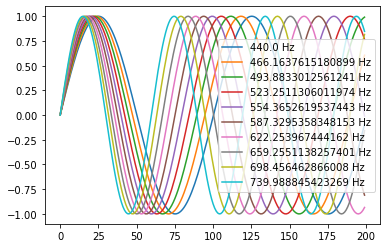

<Figure size 720x576 with 0 Axes>

In [3]:
num_frequs = 10
freqs = 440 * np.power(np.repeat(pow(2, 1/12), num_frequs), np.arange(0,num_frequs,1))
sounds = [wave(f) for f in freqs]
for i,s in enumerate(sounds):
    plt.plot(s[:200], label=str(freqs[i])+" Hz")
    #play(s)
plt.legend()
plt.figure(figsize=(10,8));


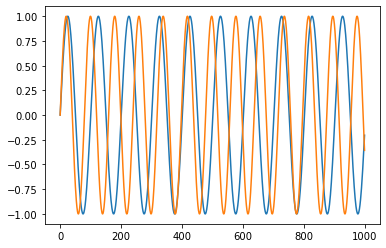

In [4]:
tests = [
    sounds[0],
    sounds[4],
    ]
for s in tests:
    plt.plot((s)[:1000])
    play(s)

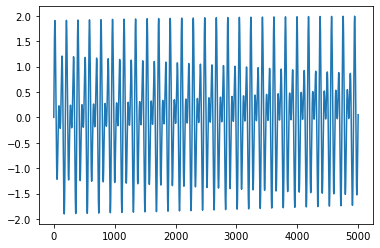

In [5]:
tests = [
    sounds[1] + sounds[8],
    ]
for s in tests:
    plt.plot((s)[:5000])
    play(s)
    

In [8]:
notes = [gen_audio(s) for s in sounds]


interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

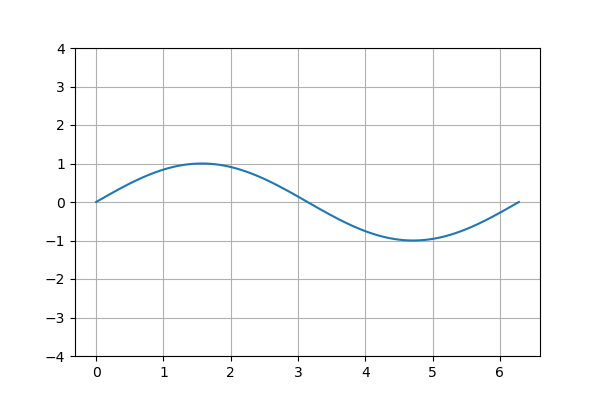

In [11]:
try:
    %matplotlib widget
except:
    %pip install ipympl
    %matplotlib widget
import ipywidgets as widgets

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 

def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 

@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')